The iris(the flower)dataset attached contains five variables namely,
1.SepalLength(Cm)
2.SepalWidth(Cm)
3.PetalLength(Cm)
4.PetalWidth(Cm)
5.Species

Perform Linear Regression on this dataset taking Sepal Length as Response or dependent variable 
and rest of the variables as independent ones


Before performing Linear Regression please check 
1.> whether there exists any multicollinearity in the independent 

variables with correlation matrix and suitable scatter plots

2.> find the correlation between dependent variable and each 

independent variable

3.> Find if there is any outlier in the variables given with suitable

boxplots

In [1]:
#Importing relevant libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\Linear Regression\iris.csv")

In [3]:
#Checking the first 5 rows of the dataset
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's do EDA to get few insights 

In [4]:
#Let's check the mean values of 'Sepal.Length','Sepal.Width','Petal.Length','Petal.Width' of 3 types of species
table = pd.pivot_table(iris,values=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'],index=['Species'],dropna=True,
                      aggfunc=np.mean)
table

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


Text(0.5, 1.0, 'Mean values of (Sepal and Petal) Lengths and Widths ')

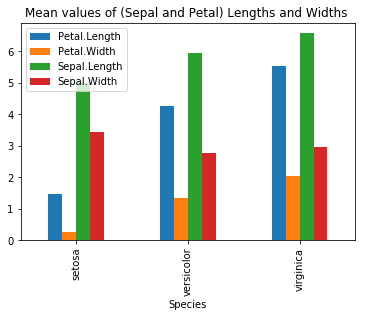

In [5]:
info = iris.groupby('Species')['Petal.Length','Petal.Width','Sepal.Length','Sepal.Width'].mean()
info.plot.bar()
plt.title("Mean values of (Sepal and Petal) Lengths and Widths ")

Let's plot scatter plot between Sepal Length (Response variable) and Other independent variables  

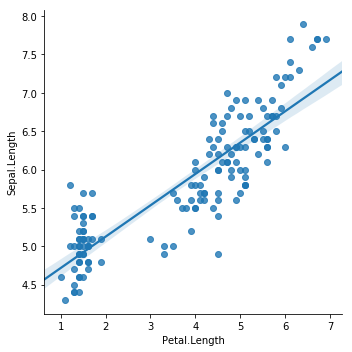

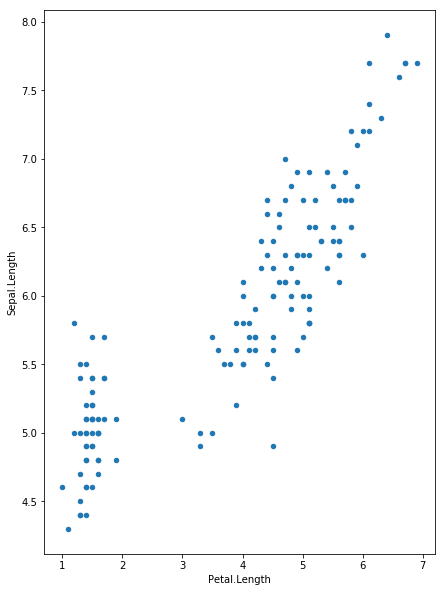

In [6]:
sns.lmplot(x='Petal.Length',y='Sepal.Length',data=iris,scatter_kws=None)
iris.plot(x='Petal.Length',y='Sepal.Length',kind='scatter',figsize=(7,10))

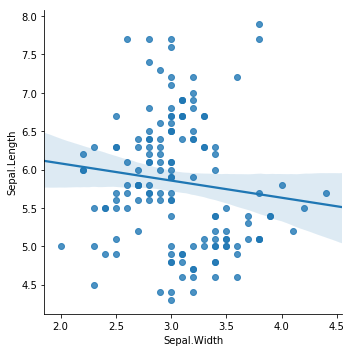

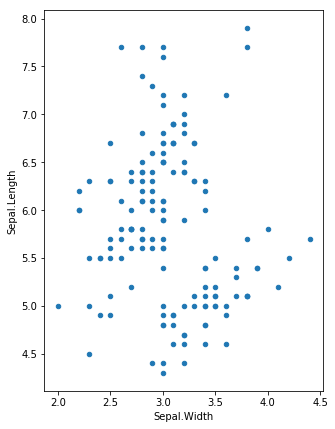

In [7]:
sns.lmplot(x='Sepal.Width',y='Sepal.Length',data=iris,scatter_kws=None)
iris.plot(x='Sepal.Width',y='Sepal.Length',kind='scatter',figsize=(5,7))

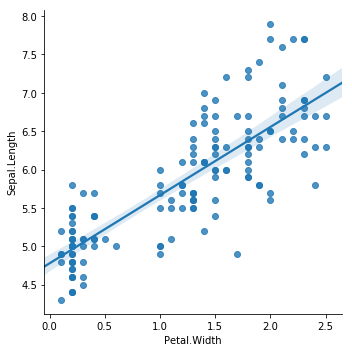

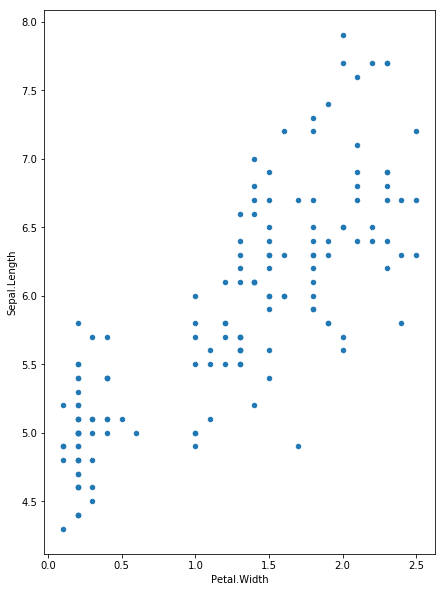

In [8]:
sns.lmplot(x='Petal.Width',y='Sepal.Length',data=iris,scatter_kws=None)
iris.plot(x='Petal.Width',y='Sepal.Length',kind='scatter',figsize=(7,10))

Let's draw a box plot to show distributions with respect to categories

<Figure size 720x720 with 0 Axes>

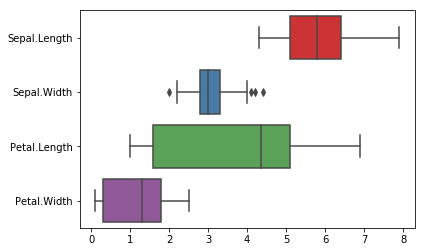

<Figure size 720x720 with 0 Axes>

In [9]:
sns.boxplot(data=iris,orient='h',palette="Set1",)
plt.figure(figsize=(10,10))

We can see few outliers in Sepal Width variable indicating that 

few values in sepal width are below the lower limit and above the upper limit 



In [10]:
#Importing Label Encoder from scikit learn library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

iris.Species = le.fit_transform(iris.Species.astype(str))
iris.Species = iris.Species.astype('category')

Separating the response or dependent variable (Sepal Length) from other independennt variables 

In [11]:
iris_X = iris.iloc[:,1:5]
iris_Y = iris.iloc[:,0]

Checking for multi-collinearity amongst X variables by plotting heatmap 

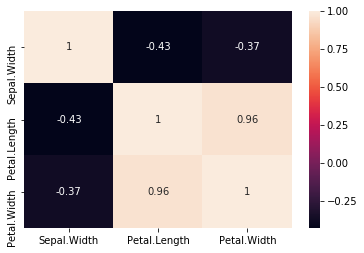

In [12]:
cor_X = sns.heatmap(iris_X.corr(), annot=True)
cor_X

In [13]:
print(iris_X.corr())

              Sepal.Width  Petal.Length  Petal.Width
Sepal.Width      1.000000     -0.428440    -0.366126
Petal.Length    -0.428440      1.000000     0.962865
Petal.Width     -0.366126      0.962865     1.000000


We can see there's strong positive correlation between Petal Length and Petal Width indicating increase in petal width leading 

to increase in petal length 

We can also see there's a negative correlation between Petal Length and Sepal Width 

In [14]:
iris_X.head(),iris_Y.head()

(   Sepal.Width  Petal.Length  Petal.Width Species
 0          3.5           1.4          0.2       0
 1          3.0           1.4          0.2       0
 2          3.2           1.3          0.2       0
 3          3.1           1.5          0.2       0
 4          3.6           1.4          0.2       0, 0    5.1
 1    4.9
 2    4.7
 3    4.6
 4    5.0
 Name: Sepal.Length, dtype: float64)

In [15]:
#Checing the shape of Independent and dependent variables 
iris_X.shape,iris_Y.shape

((150, 4), (150,))

Splitting the data into training and test data 

In [16]:
#Importing train_test_split

from sklearn.model_selection import train_test_split

In [17]:
iris_x_train,iris_x_test,iris_y_train,iris_y_test=train_test_split(iris_X,iris_Y,test_size=.2,random_state=7)

In [18]:
#Importing Linear regression algorithm
from sklearn import linear_model
reg=linear_model.LinearRegression()   # creating an instance 

In [19]:
#Fitting the linear model
iris_model = reg.fit(iris_x_train,iris_y_train)
iris_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
#predict using Linear Model 

iris_pred_value=reg.predict(iris_x_test)    
iris_pred_value

array([6.36329099, 6.28290054, 4.91003677, 6.28290054, 5.62127719,
       4.12079592, 6.6482631 , 5.93334652, 5.10518634, 6.41444069,
       6.5849406 , 6.50975555, 5.52690399, 7.2533157 , 4.95539009,
       6.53045922, 6.55872749, 6.72865355, 5.36826662, 5.12315551,
       5.74487743, 6.76309348, 6.40315199, 5.87090813, 6.96002839,
       6.13859663, 6.13978478, 5.50889437, 6.1297555 , 6.58620002])

In [21]:
#Creating a dataframe 

df=pd.DataFrame(iris_pred_value,iris_y_test)
df

,0
Sepal.Length,
5.9,6.363291
5.4,6.282901
5.0,4.910037
5.6,6.282901
4.9,5.621277
4.5,4.120796
6.9,6.648263
5.6,5.933347
4.8,5.105186


In [22]:
#Importing metrics module to calculate RMSE
from sklearn import metrics

In [23]:
#We calculate mean error and then calculate mean squared error to calculate RMSE

iris_MAE = metrics.mean_absolute_error(iris_y_test,iris_pred_value)
iris_MAE

0.28270684088671877

In [24]:
#We calculate mean squared error 
iris_MSE = metrics.mean_squared_error(iris_y_test,iris_pred_value)
iris_MSE

0.12742860821138402

In [25]:
#Finding the Root MEan Squared Error (RMSE) of the model
iris_RMSE = pow(iris_MSE,.5)    
iris_RMSE

0.35697143892948074

We can also find the intercepts and coefficients value

In [26]:
#Independent term in the linear model (b)
reg.intercept_,reg.coef_

(1.7430845488219866,
 array([ 0.6577007 ,  0.74898122, -0.36225276, -0.26032246]))

In [27]:
#we can also calculate R Squared value 
from sklearn.metrics import r2_score
r2_score(iris_y_test,iris_pred_value) 

0.7634613851907898